In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy as np

In [2]:
DATA_FILE = '../data/Problem_C_Data_Wordle.xlsx'
df = pd.read_excel(DATA_FILE,header=1)
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()
df.rename(columns={'Date':'date','Contest number':'contest_num','Word':'word','Number of  reported results':'num_results','Number in hard mode':'num_hardmode','1 try':'in1','2 tries':'in2','3 tries':'in3','4 tries':'in4','5 tries':'in5','6 tries':'in6','7 or more tries (X)':'over6'},inplace=True)


In [3]:
df.loc[15,'word'] = 'probe'
df.loc[35,'word'] = 'clean'
df.loc[246,'word'] = 'trash'
df.loc[353,'word'] = 'favor'
df.loc[20,'word'] = 'naive'

In [4]:
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.dayofweek

In [5]:
df["day_of_week"] = df["date"].dt.dayofweek
print(df)

          date  contest_num   word  num_results  num_hardmode  in1  in2  in3  \
0   2022-12-31          560  manly        20380          1899    0    2   17   
1   2022-12-30          559  molar        21204          1973    0    4   21   
2   2022-12-29          558  havoc        20001          1919    0    2   16   
3   2022-12-28          557  impel        20160          1937    0    3   21   
4   2022-12-27          556  condo        20879          2012    0    2   17   
..         ...          ...    ...          ...           ...  ...  ...  ...   
354 2022-01-11          206  drink       153880          3017    1    9   35   
355 2022-01-10          205  query       107134          2242    1    4   16   
356 2022-01-09          204  gorge        91477          1913    1    3   13   
357 2022-01-08          203  crank       101503          1763    1    5   23   
358 2022-01-07          202  slump        80630          1362    1    3   23   

     in4  in5  in6  over6  day_of_week 

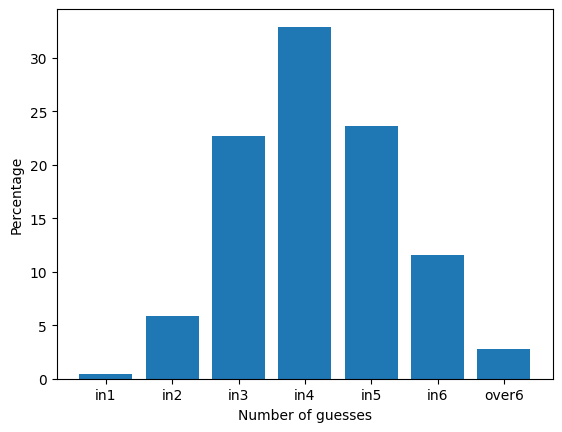

In [6]:
fig, ax = plt.subplots()

guesses = ['in1', 'in2', 'in3', 'in4', 'in5', 'in6', 'over6']

percentages = np.array([df['in1'], df['in2'], df['in3'], df['in4'], df['in5'], df['in6'], df['over6']])

ax.bar(guesses, percentages.mean(axis=1))

ax.set_xlabel('Number of guesses')
ax.set_ylabel('Percentage')

plt.show()

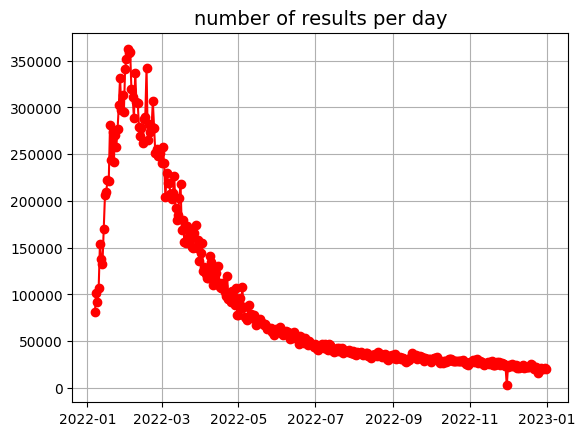

In [7]:
plt.plot(df['date'], df['num_results'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


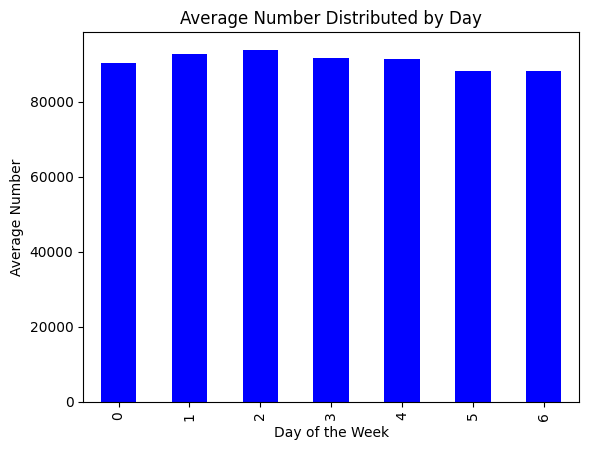

In [8]:
grouped = df.groupby('day_of_week')['num_results'].mean()

# Plot a bar chart with the grouped data
grouped.plot(kind='bar', color='blue')

# Add labels and title to the plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Number')
plt.title('Average Number Distributed by Day')
plt.show()


In [18]:
from prophet import Prophet

df_numpeople_predict = df[["date", "num_results"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()



18:15:49 - cmdstanpy - INFO - Chain [1] start processing
18:15:49 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
719,2023-12-27,-20975.979224,-957932.569318,929725.642449,-949287.927353,927555.109575,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,0.0,0.0,0.0,-17761.609528
720,2023-12-28,-21089.701089,-954395.553331,912855.884939,-953833.483910,932201.574913,1455.409403,1455.409403,1455.409403,1455.409403,1455.409403,1455.409403,0.0,0.0,0.0,-19634.291687
721,2023-12-29,-21203.422955,-961247.724322,931838.964421,-958384.797682,936647.341097,426.101618,426.101618,426.101618,426.101618,426.101618,426.101618,0.0,0.0,0.0,-20777.321337
722,2023-12-30,-21317.144820,-966037.592240,933565.484117,-962941.868669,939156.019318,-2460.785129,-2460.785129,-2460.785129,-2460.785129,-2460.785129,-2460.785129,0.0,0.0,0.0,-23777.929949
723,2023-12-31,-21430.866685,-968871.542457,939043.810319,-968648.952393,939534.076979,-3393.913594,-3393.913594,-3393.913594,-3393.913594,-3393.913594,-3393.913594,0.0,0.0,0.0,-24824.780280


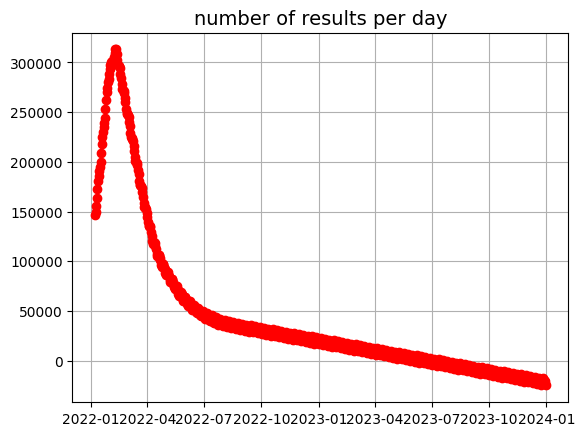

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,13254.302233,-45383.223391,76077.983868,-46321.425703,69510.961743,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,0.0,0.0,0.0,16468.671929


In [20]:
plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


18:21:13 - cmdstanpy - INFO - Chain [1] start processing
18:21:13 - cmdstanpy - INFO - Chain [1] done processing


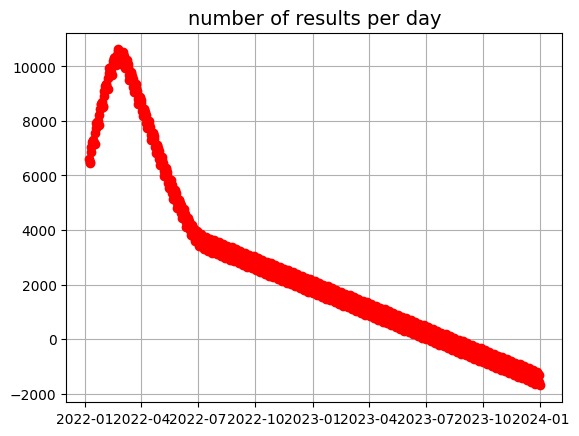

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,1428.631998,-305.853372,3554.365529,403.251304,2365.248294,175.957446,175.957446,175.957446,175.957446,175.957446,175.957446,0.0,0.0,0.0,1604.589444


In [21]:
df_numpeople_predict = df[["date", "num_hardmode"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()

plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]
